In [ ]:
##1주차 심화 실습

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/50 | Train Loss: 451.8263 | Train Acc: 0.1067
Epoch 2/50 | Train Loss: 451.4637 | Train Acc: 0.1110
Epoch 3/50 | Train Loss: 451.1192 | Train Acc: 0.1155
Epoch 4/50 | Train Loss: 450.7757 | Train Acc: 0.1218
Epoch 5/50 | Train Loss: 450.4275 | Train Acc: 0.1292
Epoch 6/50 | Train Loss: 450.0865 | Train Acc: 0.1363
Epoch 7/50 | Train Loss: 449.7505 | Train Acc: 0.1440
Epoch 8/50 | Train Loss: 449.4126 | Train Acc: 0.1511
Epoch 9/50 | Train Loss: 449.0717 | Train Acc: 0.1572
Epoch 10/50 | Train Loss: 448.7401 | Train Acc: 0.1632
Epoch 11/50 | Train Loss: 448.4181 | Train Acc: 0.1696
Epoch 12/50 | Train Loss: 448.0806 | Train Acc: 0.1748
Epoch 13/50 | Train Loss: 447.7548 | Train Acc: 0.1802
Epoch 14/50 | Train Loss: 447.4328 | Train Acc: 0.1852
Epoch 15/50 | Train Loss: 447.1069 | Train Acc: 0.1894
Epoch 16/50 | Train Loss: 446.7829 | Train Acc: 0.1935
Epoch 17/50 | Train Loss: 446.4475 | Train Acc: 0.198

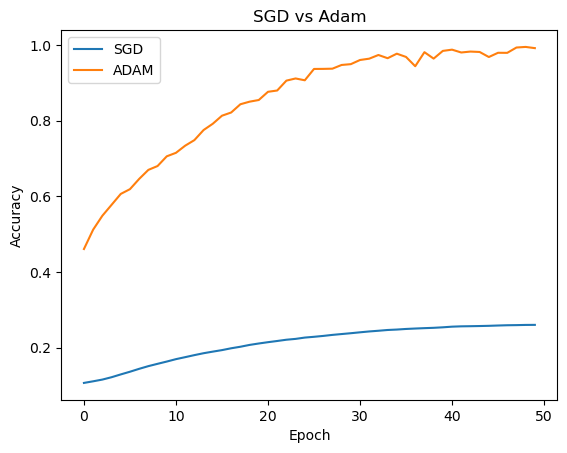

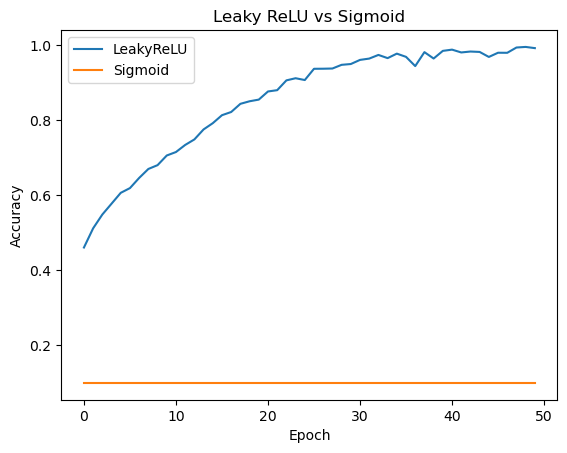

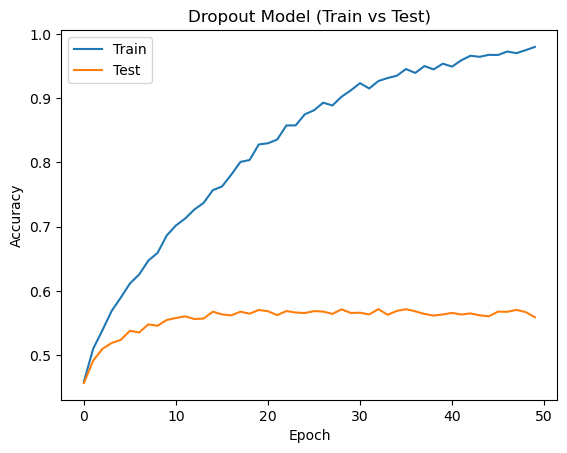

In [9]:
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# CIFAR10 데이터셋 로딩
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 데이터 정규화
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)

# 입력 차원 및 파라미터 설정
input_dim = 32 * 32 * 3  # CIFAR10의 이미지 크기 (32x32x3)
num_classes = 10
n_dim = 1024

# Leaky ReLU 모델 정의
class ModelLeakyReLU(nn.Module):
    def __init__(self, input_dim, n_dim, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, num_classes)
        self.act = nn.LeakyReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)
        return x

# Sigmoid 모델 정의
class ModelSigmoid(nn.Module):
    def __init__(self, input_dim, n_dim, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, num_classes)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)
        return x

# Dropout 모델 정의
class ModelDropout(nn.Module):
    def __init__(self, input_dim, n_dim, num_classes, dropout_rate=0.1):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, num_classes)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(self.act(self.layer1(x)))
        x = self.dropout(self.act(self.layer2(x)))
        x = self.layer3(x)
        return x

# 정확도 계산 함수
def accuracy(model, dataloader, device):
    cnt = 0
    acc = 0
    model.eval()  # 평가 모드로 설정
    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            preds = model(inputs)
            preds = torch.argmax(preds, dim=-1)  # 가장 큰 값의 인덱스를 선택

            cnt += labels.shape[0]
            acc += (labels == preds).sum().item()

    return acc / cnt

# 학습 함수
def train(model, optimizer, criterion, trainloader, device):
    total_loss = 0.
    model.train()  # 훈련 모드로 설정
    for data in trainloader:
        model.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        preds = model(inputs)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss

# 하이퍼파라미터 설정
num_epochs = 50
learning_rate = 0.0001
device = torch.device('mps')

# 모델 인스턴스 생성 (LeakyReLU 사용)
model_leaky_sgd = ModelLeakyReLU(input_dim, n_dim, num_classes).to(device)
model_leaky_adam = ModelLeakyReLU(input_dim, n_dim, num_classes).to(device)

# Sigmoid 모델 인스턴스 생성
model_sigmoid = ModelSigmoid(input_dim, n_dim, num_classes).to(device)

# Dropout 모델 인스턴스 생성
model_dropout = ModelDropout(input_dim, n_dim, num_classes).to(device)

# 손실 함수 및 optimizer 설정
criterion = nn.CrossEntropyLoss()
optimizer_sgd = SGD(model_leaky_sgd.parameters(), lr=learning_rate)
optimizer_adam = Adam(model_leaky_adam.parameters(), lr=learning_rate)
optimizer_adam_dropout = Adam(model_dropout.parameters(), lr=learning_rate)


# 학습 과정 진행 및 정확도 기록
train_accs_sgd, test_accs_sgd = [], []
train_accs_adam, test_accs_adam = [], []
train_accs_sigmoid = []
train_accs_dropout, test_accs_dropout = [], []

# SGD 학습
for epoch in range(num_epochs):
    train_loss = train(model_leaky_sgd, optimizer_sgd, criterion, trainloader, device)
    train_acc = accuracy(model_leaky_sgd, trainloader, device)
    train_accs_sgd.append(train_acc)  # train_accs_sgd에 추가
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")

# Adam 학습
for epoch in range(num_epochs):
    train_loss = train(model_leaky_adam, optimizer_adam, criterion, trainloader, device)
    train_acc = accuracy(model_leaky_adam, trainloader, device)
    train_accs_adam.append(train_acc)  # train_accs_adam에 추가
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")

# Sigmoid 학습
for epoch in range(num_epochs):
    model_sigmoid.train()
    train_loss = train(model_sigmoid, optimizer_adam, criterion, trainloader, device)
    train_acc = accuracy(model_sigmoid, trainloader, device)
    train_accs_sigmoid.append(train_acc)  # train_accs_sigmoid에 추가

# Dropout 학습
for epoch in range(num_epochs):
    model_dropout.train()
    train_loss = train(model_dropout, optimizer_adam_dropout, criterion, trainloader, device)
    test_acc = accuracy(model_dropout, testloader, device)
    train_acc = accuracy(model_dropout, trainloader, device)
    train_accs_dropout.append(train_acc)
    test_accs_dropout.append(test_acc)
    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {train_loss:.4f} | Test Acc: {test_acc:.4f}")

# 정확도 시각화 함수
def plot_acc(train_accs, test_accs, label1='train', label2='test', title='Accuracy Comparison'):
    x = np.arange(len(train_accs))
    plt.plot(x, train_accs, label=label1)
    plt.plot(x, test_accs, label=label2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot 1: SGD vs Adam
plot_acc(train_accs_sgd, train_accs_adam, label1='SGD', label2='ADAM', title='SGD vs Adam')

# Plot 2: Leaky ReLU vs Sigmoid
plot_acc(train_accs_adam, train_accs_sigmoid, label1='LeakyReLU', label2='Sigmoid', title='Leaky ReLU vs Sigmoid')

# Plot 3: Dropout 모델 (Train vs Test)
plot_acc(train_accs_dropout, test_accs_dropout, label1='Train', label2='Test', title='Dropout Model (Train vs Test)')


# 결과